1.纳入条件: 上市达180天。(日历日)
2.权重: 过去180天的平均成交额(日历日)

# 导入库

In [24]:
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).parent.parent)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from data_manager.DailyDataManager import DailyDataManager
from data_manager.ContinuousContractDataManager import ContinuousContractDataManager

# 导入连续合约数据

In [26]:
continuous_contract_data_manager = ContinuousContractDataManager()
close_df = continuous_contract_data_manager.get_field(field='continuous_price')
return_df = close_df.pct_change()

# 计算品种上市达6个月的日期

直接对上市日加180天得到上市达6个月的日期

In [27]:
date_flag_df = pd.DataFrame(index=close_df.index, columns=close_df.columns, data=np.nan)
for symbol in close_df.columns:
    close_series = close_df[symbol]
    listed_date = close_series.dropna().index[0]
    six_months_after_listed_date = listed_date + timedelta(days=180)
    print(six_months_after_listed_date)
    date_flag_df[symbol] = pd.Series(np.where(close_series.index.to_series()>=six_months_after_listed_date, True, False), index=close_series.index)

2009-07-04 00:00:00
2012-11-06 00:00:00
2009-07-04 00:00:00
2018-06-20 00:00:00
2009-07-04 00:00:00
2009-07-04 00:00:00
2014-06-04 00:00:00
2021-05-18 00:00:00
2014-04-07 00:00:00
2009-07-04 00:00:00
2009-07-04 00:00:00
2019-10-27 00:00:00
2015-06-17 00:00:00
2009-07-04 00:00:00
2018-02-14 00:00:00
2020-03-24 00:00:00
2019-06-08 00:00:00
2014-06-04 00:00:00
2013-06-01 00:00:00
2009-07-04 00:00:00
2014-09-17 00:00:00
2014-04-16 00:00:00
2015-10-13 00:00:00
2010-10-13 00:00:00
2015-10-13 00:00:00
2011-10-12 00:00:00
2014-05-07 00:00:00
2013-09-18 00:00:00
2014-05-17 00:00:00
2009-07-04 00:00:00
2021-07-07 00:00:00
2015-01-04 00:00:00
2020-12-19 00:00:00
2009-07-04 00:00:00
2012-04-25 00:00:00
2015-09-23 00:00:00
2020-02-08 00:00:00
2009-07-04 00:00:00
2009-07-04 00:00:00
2011-09-20 00:00:00
2021-04-10 00:00:00
2020-09-26 00:00:00
2021-07-31 00:00:00
2012-07-15 00:00:00
2014-08-27 00:00:00
2009-09-23 00:00:00
2009-10-17 00:00:00
2013-06-26 00:00:00
2020-02-12 00:00:00
2013-06-26 00:00:00


In [28]:
date_flag_df

underlying_symbol,A,AG,AL,AP,AU,B,BB,BC,BU,C,...,TF,TS,UR,V,WH,WR,WT,Y,ZC,ZN
datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-01-06,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-01-07,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-01-08,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2009-01-09,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-02-23,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True
2021-02-24,True,True,True,True,True,True,True,False,True,True,...,True,True,True,True,True,True,True,True,True,True


# 计算品种每日成交额

In [29]:
daily_data_manager = DailyDataManager()
daily_turnover = daily_data_manager.daily_data.groupby(['datetime', 'underlying_symbol'])['turnover'].sum()

In [30]:
daily_turnover

datetime    underlying_symbol
2009-01-05  A                    3.230650e+10
            AL                   3.586329e+10
            AU                   8.323410e+09
            B                    1.565030e+07
            C                    3.652974e+09
                                     ...     
2021-02-26  WH                   1.308904e+07
            WR                   1.920550e+06
            Y                    8.029319e+10
            ZC                   4.530350e+10
            ZN                   4.154148e+10
Name: turnover, Length: 125954, dtype: float64

## 将不满足上市180天的品种删除，成交额标记为0

In [31]:
daily_turnover = daily_turnover.unstack(level=-1)

In [32]:
daily_turnover.shape

(2953, 71)

In [33]:
date_flag_df.shape

(2953, 71)

In [34]:
daily_turnover[~date_flag_df] = np.nan

In [35]:
daily_turnover = daily_turnover.stack()

In [36]:
daily_turnover

datetime    underlying_symbol
2009-07-06  A                    6.262116e+09
            AL                   3.598099e+09
            AU                   2.707156e+09
            B                    3.614100e+06
            C                    2.073647e+09
                                     ...     
2021-02-26  WH                   1.308904e+07
            WR                   1.920550e+06
            Y                    8.029319e+10
            ZC                   4.530350e+10
            ZN                   4.154148e+10
Length: 117719, dtype: float64

In [37]:
daily_turnover = daily_turnover.to_frame("turnover").reset_index()

## 删除IH,IF,IC,T,TF,TS

In [38]:
daily_turnover = daily_turnover[~daily_turnover.underlying_symbol.isin(('IH', 'IF', 'IC', 'T', 'TF', 'TS'))]

## 每组成交额

1月第一个交易日调仓，7月第一个交易日调仓

In [39]:
daily_turnover['year'] = daily_turnover['datetime'].dt.year
daily_turnover['month'] = daily_turnover['datetime'].dt.month

In [40]:
daily_turnover['month_group'] = pd.Series(np.where(daily_turnover['month'] >= 7, 1, 0),index=daily_turnover.index)

In [41]:
daily_turnover['group_turnover'] = daily_turnover.groupby(['year', 'month_group', 'underlying_symbol'])['turnover'].transform(lambda x: x.sum())

In [42]:
group_daily_turnover = daily_turnover[['underlying_symbol', 'year', 'month_group', 'group_turnover']].drop_duplicates()

In [43]:
group_daily_turnover

,underlying_symbol,year,month_group,group_turnover
0,A,2009,1,1.540146e+12
1,AL,2009,1,1.306977e+12
2,AU,2009,1,1.018123e+12
3,B,2009,1,8.553412e+08
4,C,2009,1,3.270675e+11
...,...,...,...,...
115470,WH,2021,0,2.632027e+08
115471,WR,2021,0,5.862900e+07
115472,Y,2021,0,1.919047e+12
115473,ZC,2021,0,1.593206e+12


In [44]:
group_daily_turnover = group_daily_turnover.set_index(['underlying_symbol', 'year', 'month_group']).unstack(level='underlying_symbol')

In [45]:
group_daily_turnover = group_daily_turnover.shift(1)

In [46]:
group_daily_turnover

group_turnover                                            \
underlying_symbol              A            AG            AL            AP   
year month_group                                                             
2009 1                       NaN           NaN           NaN           NaN   
2010 0              1.540146e+12           NaN  1.306977e+12           NaN   
     1              1.211457e+12           NaN  1.663214e+12           NaN   
2011 0              1.873744e+12           NaN  1.171032e+12           NaN   
     1              9.904290e+11           NaN  4.464010e+11           NaN   
2012 0              1.282097e+12           NaN  1.260387e+12           NaN   
     1              8.921769e+11           NaN  3.075295e+11           NaN   
2013 0              3.397392e+12  1.107728e+12  3.113445e+11           NaN   
     1              4.975280e+11  2.571919e+12  2.827176e+11           NaN   
2014 0              5.147781e+11  2.050249e+13  1.986210e+11           NaN   
     1              8.742847e+11  1.298620e+13  5.890081e+11           NaN   
2015 0              1.568341e+12  1.003111e+13  1.336573e+12           NaN   
     1              7.071726e+11  9.398660e+12  6.192416e+11           NaN   
2016 0              8.370606e+11  5.831110e+12  1.928881e+12           NaN   
     1              1.278879e+12  4.077520e+12  2.409252e+12           NaN   
2017 0              1.169120e+12  6.216450e+12  3.100042e+12           NaN   
     1              1.214508e+12  3.286073e+12  3.565246e+12           NaN   
2018 0              8.343732e+11  3.119092e+12  6.286851e+12           NaN   
     1              7.591462e+11  2.541638e+12  3.707378e+12  1.263138e+11   
2019 0              8.564661e+11  2.104622e+12  3.002973e+12  1.999460e+12   
     1              5.854681e+11  2.737626e+12  2.357027e+12  3.264333e+12   
2020 0              6.987187e+11  1.513841e+13  2.191270e+12  3.474885e+12   
     1              1.246919e+12  5.592780e+12  1.408163e+12  1.967799e+12   
2021 0              1.549749e+12  2.236715e+13  2.313927e+12  2.713194e+12   

                                                                           \
underlying_symbol            AU             B            BB            BU   
year month_group                                                            
2009 1                      NaN           NaN           NaN           NaN   
2010 0             1.018123e+12  8.553412e+08           NaN           NaN   
     1             9.658913e+11  5.140768e+08           NaN           NaN   
2011 0             8.632988e+11  7.211216e+08           NaN           NaN   
     1             5.966150e+11  3.762649e+08           NaN           NaN   
2012 0             4.500146e+12  6.402730e+08           NaN           NaN   
     1             2.165474e+12  3.012120e+08           NaN           NaN   
2013 0             1.870205e+12  6.863045e+08           NaN           NaN   
     1             2.134824e+12  3.397717e+08           NaN           NaN   
2014 0             8.573704e+12  2.721931e+08           NaN           NaN   
     1             5.874273e+12  2.361130e+08  2.170578e+11  1.329464e+10   
2015 0             6.107762e+12  2.760865e+08  4.955462e+11  6.257974e+09   
     1             5.331071e+12  1.848591e+08  2.013653e+10  2.290853e+11   
2016 0             6.652286e+12  1.149935e+08  5.657141e+08  1.242527e+12   
     1             1.069404e+13  9.418962e+07  2.246650e+07  4.113946e+12   
2017 0             7.990131e+12  3.713852e+07  8.637589e+08  3.224616e+12   
     1             5.999097e+12  1.529452e+08  1.195791e+08  2.907857e+12   
2018 0             4.838683e+12  2.660419e+09  1.875435e+07  2.157004e+12   
     1             4.397898e+12  6.345943e+11  5.250590e+07  1.549546e+12   
2019 0             4.451191e+12  1.032773e+12  4.335990e+07  2.842772e+12   
     1             8.840913e+12  5.646613e+11  4.046565e+07  3.440489e+12   
2020 0             2.115024e+13  5.351196e+11  1.720595e+07  3.

In [47]:
group_daily_turnover = group_daily_turnover.stack().reset_index()

In [48]:
group_daily_turnover

,year,month_group,underlying_symbol,group_turnover
0,2010,0,A,1.540146e+12
1,2010,0,AL,1.306977e+12
2,2010,0,AU,1.018123e+12
3,2010,0,B,8.553412e+08
4,2010,0,C,3.270675e+11
...,...,...,...,...
897,2021,0,WH,4.940825e+08
898,2021,0,WR,6.626587e+07
899,2021,0,Y,8.017066e+12
900,2021,0,ZC,3.661638e+12


In [49]:
daily_turnover = daily_turnover.drop(columns='group_turnover')

In [50]:
daily_turnover

,datetime,underlying_symbol,turnover,year,month,month_group
0,2009-07-06,A,6.262116e+09,2009,7,1
1,2009-07-06,AL,3.598099e+09,2009,7,1
2,2009-07-06,AU,2.707156e+09,2009,7,1
3,2009-07-06,B,3.614100e+06,2009,7,1
4,2009-07-06,C,2.073647e+09,2009,7,1
...,...,...,...,...,...,...
117714,2021-02-26,WH,1.308904e+07,2021,2,0
117715,2021-02-26,WR,1.920550e+06,2021,2,0
117716,2021-02-26,Y,8.029319e+10,2021,2,0
117717,2021-02-26,ZC,4.530350e+10,2021,2,0


In [51]:
group_daily_turnover

,year,month_group,underlying_symbol,group_turnover
0,2010,0,A,1.540146e+12
1,2010,0,AL,1.306977e+12
2,2010,0,AU,1.018123e+12
3,2010,0,B,8.553412e+08
4,2010,0,C,3.270675e+11
...,...,...,...,...
897,2021,0,WH,4.940825e+08
898,2021,0,WR,6.626587e+07
899,2021,0,Y,8.017066e+12
900,2021,0,ZC,3.661638e+12


In [52]:
daily_turnover = pd.merge(left=daily_turnover, right=group_daily_turnover, on=['year', 'month_group', 'underlying_symbol'], how='left')

In [53]:
daily_turnover

,datetime,underlying_symbol,turnover,year,month,month_group,group_turnover
0,2009-07-06,A,6.262116e+09,2009,7,1,NaN
1,2009-07-06,AL,3.598099e+09,2009,7,1,NaN
2,2009-07-06,AU,2.707156e+09,2009,7,1,NaN
3,2009-07-06,B,3.614100e+06,2009,7,1,NaN
4,2009-07-06,C,2.073647e+09,2009,7,1,NaN
...,...,...,...,...,...,...,...
109042,2021-02-26,WH,1.308904e+07,2021,2,0,4.940825e+08
109043,2021-02-26,WR,1.920550e+06,2021,2,0,6.626587e+07
109044,2021-02-26,Y,8.029319e+10,2021,2,0,8.017066e+12
109045,2021-02-26,ZC,4.530350e+10,2021,2,0,3.661638e+12


In [54]:
daily_turnover = daily_turnover[daily_turnover.datetime.dt.year >= 2010]

In [55]:
daily_turnover = daily_turnover[['datetime', 'underlying_symbol', 'group_turnover']]

In [56]:
daily_turnover['weight'] = daily_turnover.groupby('datetime')['group_turnover'].transform(lambda x:x/x.sum())

In [57]:
stack_return_df = return_df.stack().to_frame("return")

In [58]:
daily_turnover = pd.merge(left=daily_turnover, right=stack_return_df, on=['datetime', 'underlying_symbol'], how='left')

# 计算指数

In [59]:
daily_turnover

,datetime,underlying_symbol,group_turnover,weight,return
0,2010-01-04,A,1.540146e+12,2.080474e-02,0.004705
1,2010-01-04,AL,1.306977e+12,1.765503e-02,-0.010926
2,2010-01-04,AU,1.018123e+12,1.375310e-02,-0.006262
3,2010-01-04,B,8.553412e+08,1.155420e-05,0.010037
4,2010-01-04,C,3.270675e+11,4.418123e-03,0.010144
...,...,...,...,...,...
106490,2021-02-26,WH,4.940825e+08,2.309413e-06,-0.003984
106491,2021-02-26,WR,6.626587e+07,3.097362e-07,0.000000
106492,2021-02-26,Y,8.017066e+12,3.747292e-02,-0.010059
106493,2021-02-26,ZC,3.661638e+12,1.711502e-02,-0.017431


In [60]:
def func(df):
    df = df.fillna(0.0)
    return (df['weight']*df['return']).sum()

In [61]:
index_series = daily_turnover.groupby(by=['datetime'], as_index=True).apply(func)

In [62]:
cum_index_series = (1+index_series).cumprod()

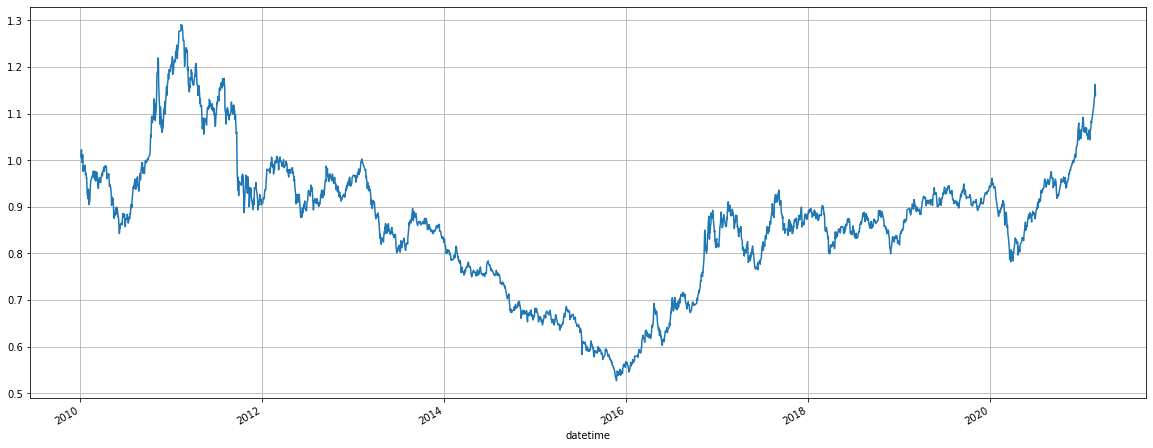

In [63]:
cum_index_series.plot(figsize=(20, 8))
plt.grid()

In [64]:
cum_index_series.to_pickle("D:/LFProjects/NewPythonProject/data/index/commodity_index.pkl")